<a href="https://colab.research.google.com/github/AnimeshBanik144/the-phiQKD-protocol-codes/blob/main/GSD_to_phiQKD_protocol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install qiskit[visualization]
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import RYGate

In [3]:
def ortho(vector):
  return np.array([np.conj(vector[1]), -np.conj(vector[0])])

In [4]:
zero_ket = np.array([1, 0])
one_ket = np.array([0, 1])
psi_1 = zero_ket
theta = np.pi/4

psi_2 = Statevector([1, 0]).evolve(RYGate(theta * 2)).data
print(f'theta = {theta}')
phi_helstrom = (np.pi / 2 - theta) / 2
print(f'phi_hestrom = {phi_helstrom}')

theta = 0.7853981633974483
phi_hestrom = 0.39269908169872414


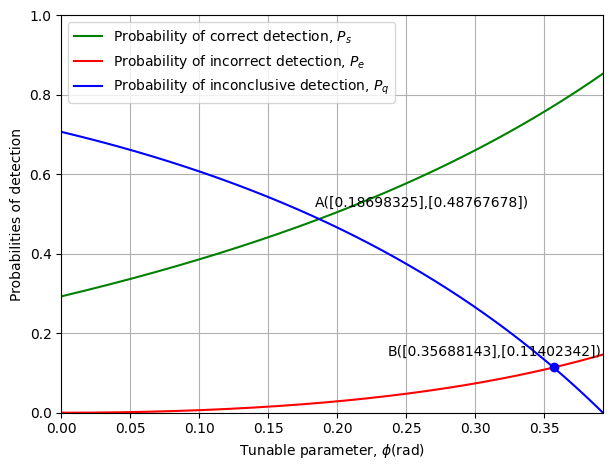

In [7]:
phi = np.linspace(0.000001, phi_helstrom, 10000)
P_s = (np.sin(theta + phi)**2) / (1 + np.cos(theta + 2*phi))
P_e = (np.sin(phi)**2) / (1 + np.cos(theta + 2*phi))
P_q = ((np.cos(theta + 2*phi)) * (np.cos(phi) + np.cos(theta + phi))**2) / ((1 + np.cos(theta + 2*phi))**2)

idx1 = np.argwhere(np.diff(np.sign(P_q - P_s))).flatten()
# print(idx1)
idx2 = np.argwhere(np.diff(np.sign(P_q - P_e))).flatten()
# print(idx2)

plt.plot(phi, P_s, color='green', label='Probability of correct detection, $P_s$')
plt.plot(phi, P_e, color='red', label='Probability of incorrect detection, $P_e$')
plt.plot(phi, P_q, color='blue', label='Probability of inconclusive detection, $P_q$')
# plt.plot(phi[idx1],P_q[idx1],'bo')
plt.plot(phi[idx2],P_q[idx2],'bo')
a=phi[idx1]
b=P_q[idx1]
plt.annotate(f'A({a},{b})',(phi[idx1]-0.003,P_q[idx1]+0.03))
plt.annotate(f'B({phi[idx2]},{P_q[idx2]})',(phi[idx2]-0.12,P_q[idx2]+0.03))

plt.xlabel('Tunable parameter, $\\phi$(rad)')
plt.ylabel('Probabilities of detection')
plt.xlim(0,phi_helstrom)
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('probabilities.png', dpi=300)
plt.show()

sifting efficiency at highest asymptotic key rate = 0.338671990153944
Highest asymptotic key rate = 0.3100542325061994
Optimal value of phi for highest asymptotic key rate = 0.050389202702216536


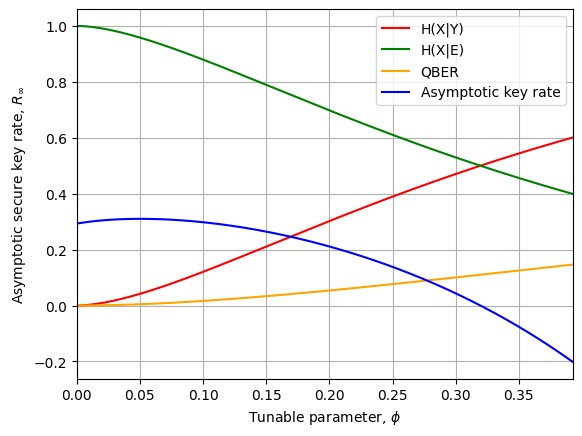

In [8]:
eta = 1 - P_q
Q = P_e / eta
h_xy = -Q * np.log2(Q) - (1-Q) * np.log2(1-Q)
c = (psi_1.conj().T @ psi_2).real**2
h_xe = np.log2(1/c) - h_xy
akr = eta * (np.log2(1/c) - 2*h_xy)
print(f'sifting efficiency at highest asymptotic key rate = {eta[np.argmax(akr)]}')
print(f'Highest asymptotic key rate = {np.max(akr)}')
print(f'Optimal value of phi for highest asymptotic key rate = {phi[np.argmax(akr)]}')
plt.xlim(0,phi_helstrom)
plt.plot(phi,h_xy,color='red', label='H(X|Y)')
plt.plot(phi,h_xe,color='green', label='H(X|E)')
plt.plot(phi,Q,color='orange', label='QBER')
plt.plot(phi,akr,color='blue', label='Asymptotic key rate')
plt.grid(True)
plt.legend()
plt.xlabel('Tunable parameter, $\\phi$')
plt.ylabel('Asymptotic secure key rate, $R_{\\infty}$')
plt.savefig('key_rate_vs_phi.png', dpi=300)
plt.show()


In [9]:
n = 10**5
N = 10**6
eps_pe = 10**(-10)
delta = np.sqrt(np.log(2/eps_pe)/(2*n))
print(delta)

0.010890132715100491


The optimal value of phi for the highest finite key rate is 0.08326131935206472
The highest finite key rate is 0.1880608277554334


Text(0.5, 1.0, 'Finite secure key rate VS $\\phi$')

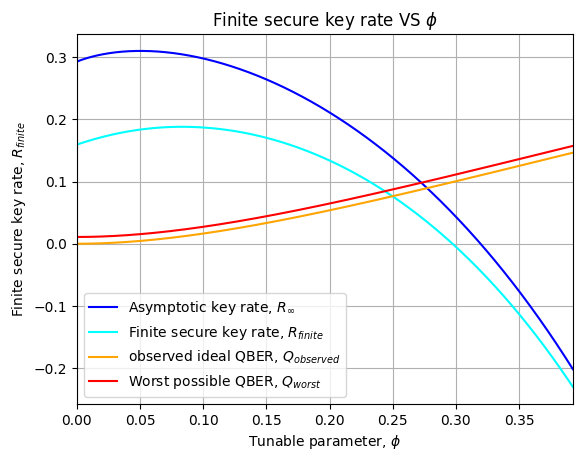

In [11]:
eta = P_s + P_e
Q_w = Q + delta
h_q_w = -Q_w * np.log2(Q_w) - (1-Q_w) * np.log2(1-Q_w)
h_xe_w = np.log2(1/c) - h_q_w

fkr = (eta-(n/N)) * (np.log2(1/c) - 2*h_q_w)

plt.plot(phi,akr,color='blue',label='Asymptotic key rate, $R_{\\infty}$')
plt.plot(phi,fkr,color='cyan',label='Finite secure key rate, $R_{finite}$')
print(f'The optimal value of phi for the highest finite key rate is {phi[np.argmax(fkr)]}')
print(f'The highest finite key rate is {np.max(fkr)}')
plt.plot(phi,Q,color='orange',label='observed ideal QBER, $Q_{observed}$')
plt.plot(phi,Q_w,color='red',label='Worst possible QBER, $Q_{worst}$')
plt.grid(True)
plt.xlim(0,phi_helstrom)
# plt.ylim(0,0.5)
plt.xlabel('Tunable parameter, $\\phi$')
plt.ylabel('Finite secure key rate, $R_{finite}$')
plt.legend()
plt.title('Finite secure key rate VS $\\phi$')


In [12]:
psi_1_ortho = ortho(psi_1)
psi_2_ortho = ortho(psi_2)
numerator = ((psi_1_ortho.conj().T @ psi_2)**2 + (psi_2_ortho.conj().T @ psi_1)**2)
ps = numerator/(2*(1+np.abs(psi_2.conj().T @ psi_1)))
ps = ps.real.round(6)
print(ps)

0.292893


0.15692861729032484
Highest asymptotic key rate found = 0.3100542325061994 at optimal phi = 0.050389202702216536
Highest finite key rate found = 0.1880608277554334 at optimal phi = 0.08326131935206472
Highest composably secure key rate found = 0.18202593650664095 at optimal phi = 0.07395344402827259
Secure key rate for B92 = 0.15692861729032484
Efficiency = 15.992825049802718


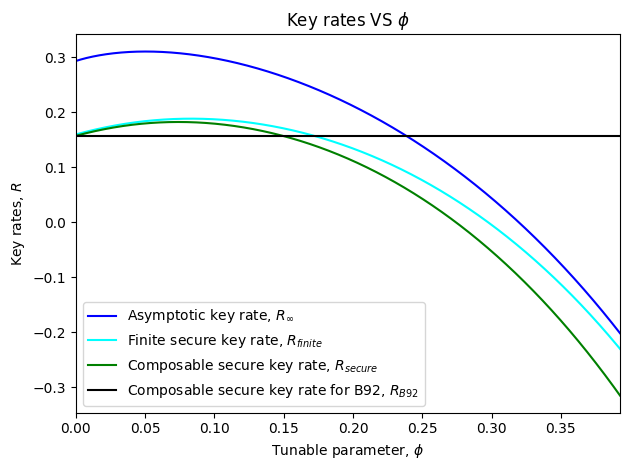

In [15]:
Q_w = (P_e / eta) + delta
eps_sec = 10**(-10)
eps_cor = 10**(-10)
h_Q = -Q_w * np.log2(Q_w) - (1-Q_w) * np.log2(1-Q_w)
skr = (eta-(n/N)) * (np.log2(1/c) - (2.15)*h_Q) - np.log2(2/(eps_sec**2)*eps_cor)/N

Q_bw = 0.01089
h_q_bw = -Q_bw * np.log2(Q_bw) - (1-Q_bw) * np.log2(1-Q_bw)
skr_b92 = (ps-n/N) * (np.log2(1/c) - 2.15*h_q_bw) - np.log2(2/(eps_sec**2)*eps_cor)/N
print(skr_b92)
plt.xlabel('Tunable parameter, $\\phi$')
plt.ylabel('Key rates, $R$')
plt.title('Key rates VS $\\phi$')
plt.plot(phi,akr,color='blue',label='Asymptotic key rate, $R_{\\infty}$')
plt.plot(phi,fkr,color='cyan',label='Finite secure key rate, $R_{finite}$')
plt.plot(phi,skr,color='green',label='Composable secure key rate, $R_{secure}$')
plt.axhline(y=skr_b92,color='black',label='Composable secure key rate for B92, $R_{B92}$')

plt.xlim(0,phi_helstrom)
# plt.ylim(0,0.0002)
plt.legend(loc='lower left')  # Outside right
plt.tight_layout()
plt.savefig('phiQKD_plot.png', dpi=300, bbox_inches='tight')
print(f'Highest asymptotic key rate found = {akr[np.argmax(akr)]} at optimal phi = {phi[np.argmax(akr)]}')
print(f'Highest finite key rate found = {fkr[np.argmax(fkr)]} at optimal phi = {phi[np.argmax(fkr)]}')
print(f'Highest composably secure key rate found = {np.max(skr)} at optimal phi = {phi[np.argmax(skr)]}')
print(f'Secure key rate for B92 = {skr_b92}')
efficiency = ((skr[np.argmax(skr)]-skr_b92)*100)/(skr_b92)
print(f'Efficiency = {efficiency}')

pih = phi[np.argmax(skr)]

In [16]:
phi_2 = 0
for (i,v) in enumerate(skr):
  if v > skr_b92 and v > 0:
    phi_2 = phi[i]
phi_1 = 0
percentage = phi_2*100/phi_helstrom
print(percentage)
print(phi_2)

37.97395532816595
0.14912337385839142


In [21]:
p_P_s = (np.sin(theta + pih)**2) / (1 + np.cos(theta + 2*pih))
p_P_e = (np.sin(pih)**2) / (1 + np.cos(theta + 2*pih))
p_P_q = ((np.cos(theta + 2*pih)) * (np.cos(pih) + np.cos(theta + pih))**2) / ((1 + np.cos(theta + 2*pih))**2)
print('Ps =',p_P_s)
print('Pe =',p_P_e)
print('Pq =',p_P_q)
print('The phi for which secure key rate is the highest =',pih)

Ps = 0.3596356661199103
Pe = 0.0034222747375317834
Pq = 0.6369420591425579
The phi for which secure key rate is the highest = 0.07395344402827259
